In [1]:
import scanpy as sc

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
import seaborn as sns
import pandas as pd

In [3]:
#read_adata
adata_train = sc.read_h5ad('../lupus/data_for_machine_learning/20240103_lupus_sample_train_175.h5ad')

In [4]:
Ucell_result = pd.read_parquet('/data/scPAFA_paper/lupus_file/20231115_Ucell_lupus_bioplanet.parquet')
Ucell_result = Ucell_result.loc[adata_train.obs.index]

In [5]:
use_obs = adata_train.obs[adata_train.obs['author_cell_type'].isin(['B','NK','T4','T8','cDC','cM','ncM'])].copy()
use_obs['author_cell_type'] = use_obs['author_cell_type'].astype(str).astype('category')

In [6]:
use_obs = use_obs[['author_cell_type','disease']]

In [8]:
use_obs['author_cell_type'].value_counts()

author_cell_type
T4     189897
cM     168032
T8     131317
B       82238
NK      47231
ncM     27813
cDC      9685
Name: count, dtype: int64

In [7]:
use_obs.loc[:,'bioplanet_686_Interferon alpha/beta signaling'] = Ucell_result.loc[use_obs.index,'bioplanet_686_Interferon alpha/beta signaling']
use_obs.loc[:,'bioplanet_675_Type II interferon signaling (interferon-gamma)'] = Ucell_result.loc[use_obs.index,'bioplanet_675_Type II interferon signaling (interferon-gamma)']
use_obs.loc[:,'bioplanet_1510_Cross-presentation of particulate exogenous antigens (phagosomes)'] = Ucell_result.loc[use_obs.index,'bioplanet_1510_Cross-presentation of particulate exogenous antigens (phagosomes)']
use_obs.loc[:,'bioplanet_12_Granzyme A-mediated apoptosis pathway'] = Ucell_result.loc[use_obs.index,'bioplanet_12_Granzyme A-mediated apoptosis pathway']
use_obs.loc[:,'bioplanet_324_CTL mediated immune response against target cells'] = Ucell_result.loc[use_obs.index,'bioplanet_324_CTL mediated immune response against target cells']

In [11]:
from scipy.stats import mannwhitneyu
def pairwise_mannwhitneyu(data, category_col, group_col, value_col):
    categories = data[category_col].unique()  # 获取唯一的类别值
    results = {}  # 用于存储结果的字典

    for cat in categories:
        cat_data = data[data[category_col] == cat]  # 根据类别筛选数据
        groups = cat_data[group_col].unique()  # 获取唯一的组别值

        group1 = cat_data[cat_data[group_col] == groups[0]][value_col]
        group2 = cat_data[cat_data[group_col] == groups[1]][value_col]

        # 执行 Mann-Whitney U 检验
        statistic, p_value = mannwhitneyu(group1, group2)

        results[cat] = p_value

    # 创建包含 p 值的数据框
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['p_value'])
    return results_df

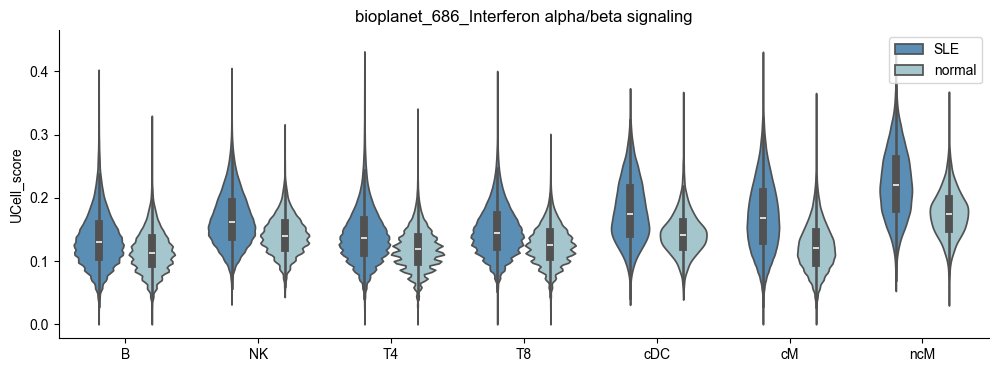

In [9]:
plt.figure(figsize=(12, 4))
sns.violinplot(data=use_obs, x='author_cell_type', y='bioplanet_686_Interferon alpha/beta signaling', hue="disease",cut=0,palette=["#4b91c3","#9ecad2"])
plt.legend(loc='best') 
sns.despine()
plt.title('bioplanet_686_Interferon alpha/beta signaling')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('UCell_score')
plt.savefig('../lupus/figure_lupus/20240110_lupus_violin_bioplanet_686_Interferon alphabeta signaling.pdf',bbox_inches = "tight", transparent=True)
plt.show()

In [10]:
pairwise_mannwhitneyu(use_obs,category_col='author_cell_type',group_col="disease",value_col='bioplanet_686_Interferon alpha/beta signaling')

,p_value
B,0.000000e+00
T4,0.000000e+00
T8,0.000000e+00
NK,0.000000e+00
cM,0.000000e+00
ncM,0.000000e+00
cDC,4.403999e-272


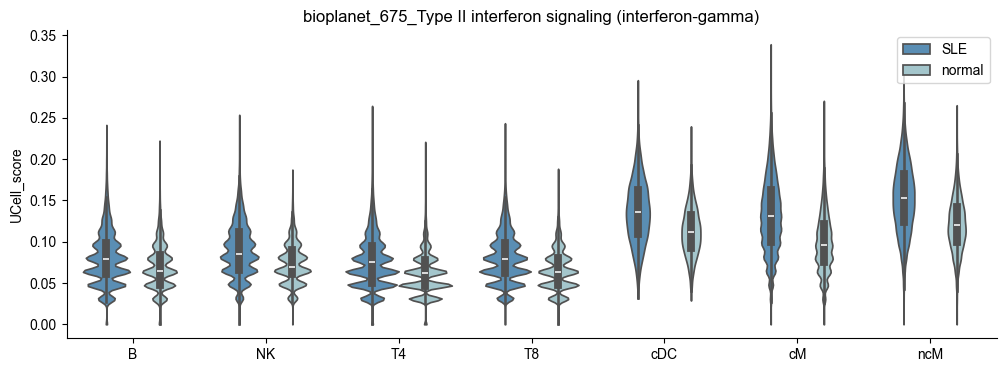

In [11]:
plt.figure(figsize=(12, 4))
sns.violinplot(data=use_obs, x='author_cell_type', y='bioplanet_675_Type II interferon signaling (interferon-gamma)', hue="disease",cut=0,palette=["#4b91c3","#9ecad2"])
plt.legend(loc='best') 
sns.despine()
plt.title('bioplanet_675_Type II interferon signaling (interferon-gamma)')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('UCell_score')
plt.savefig('../lupus/figure_lupus/20240110_lupus_violin_bioplanet_675_Type II interferon signaling (interferon-gamma).pdf',bbox_inches = "tight", transparent=True)
plt.show()

In [12]:
pairwise_mannwhitneyu(use_obs,category_col='author_cell_type',group_col="disease",value_col='bioplanet_675_Type II interferon signaling (interferon-gamma)')

,p_value
B,0.000000e+00
T4,0.000000e+00
T8,0.000000e+00
NK,0.000000e+00
cM,0.000000e+00
ncM,0.000000e+00
cDC,3.941981e-192


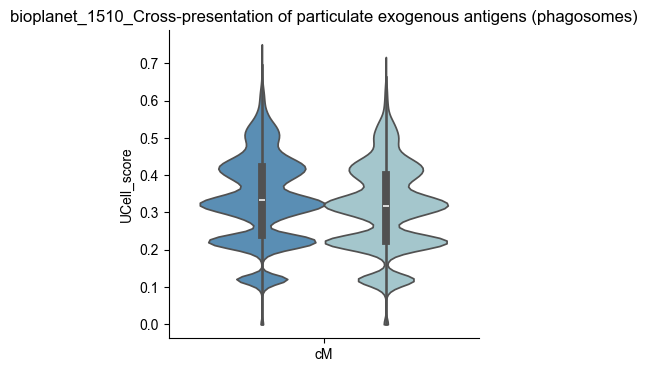

In [13]:
pathway2 = use_obs[use_obs['author_cell_type'] == 'cM'].copy()
pathway2 ['author_cell_type'] = pathway2 ['author_cell_type'].astype(str).astype('category')
plt.figure(figsize=(4, 4))
sns.violinplot(data=pathway2, x='author_cell_type', y="bioplanet_1510_Cross-presentation of particulate exogenous antigens (phagosomes)",cut=0, hue="disease",palette=["#4b91c3","#9ecad2"])
plt.legend().remove() 
sns.despine()
plt.title('bioplanet_1510_Cross-presentation of particulate exogenous antigens (phagosomes)')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('UCell_score')
plt.savefig('../lupus/figure_lupus/20240110_lupus_violin_bioplanet_1510_Cross-presentation of particulate exogenous antigens (phagosomes).pdf',bbox_inches = "tight", transparent=True)
plt.show()

In [14]:
pairwise_mannwhitneyu(pathway2,category_col='author_cell_type',group_col="disease",value_col='bioplanet_1510_Cross-presentation of particulate exogenous antigens (phagosomes)')

,p_value
cM,2.006601e-263


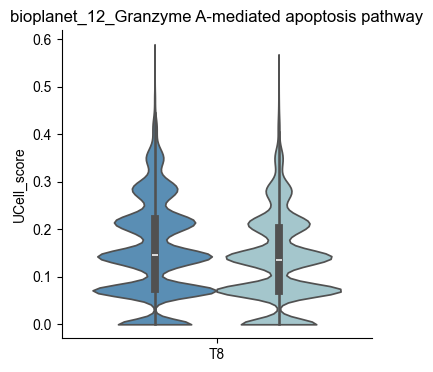

In [9]:
pathway3 = use_obs[use_obs['author_cell_type'] == 'T8'].copy()
pathway3 ['author_cell_type'] = pathway3 ['author_cell_type'].astype(str).astype('category')
plt.figure(figsize=(4, 4))
sns.violinplot(data=pathway3, x='author_cell_type', y="bioplanet_12_Granzyme A-mediated apoptosis pathway",cut=0, hue="disease",palette=["#4b91c3","#9ecad2"])
plt.legend().remove() 
sns.despine()
plt.title('bioplanet_12_Granzyme A-mediated apoptosis pathway')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('UCell_score')
plt.savefig('../lupus/figure_lupus/20240110_lupus_violin_bioplanet_12_Granzyme A-mediated apoptosis pathway.pdf',bbox_inches = "tight", transparent=True)
plt.show()

In [12]:
pairwise_mannwhitneyu(pathway3,category_col='author_cell_type',group_col="disease",value_col='bioplanet_12_Granzyme A-mediated apoptosis pathway')

,p_value
T8,3.139553e-292


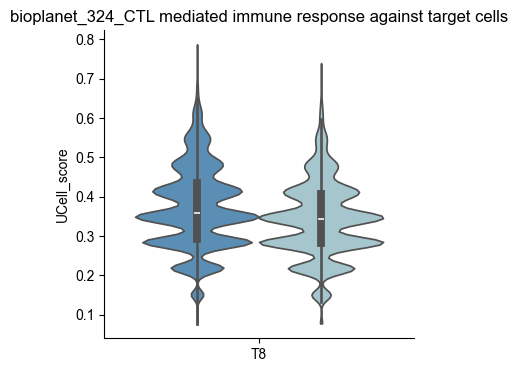

In [13]:
pathway4 = use_obs[use_obs['author_cell_type'] == 'T8'].copy()
pathway4 ['author_cell_type'] = pathway4 ['author_cell_type'].astype(str).astype('category')
plt.figure(figsize=(4, 4))
sns.violinplot(data=pathway4, x='author_cell_type', y="bioplanet_324_CTL mediated immune response against target cells",cut=0, hue="disease",palette=["#4b91c3","#9ecad2"])
plt.legend().remove() 
sns.despine()
plt.title('bioplanet_324_CTL mediated immune response against target cells')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('UCell_score')
plt.savefig('../lupus/figure_lupus/20240110_lupus_violin_bioplanet_324_CTL mediated immune response against target cells.pdf',bbox_inches = "tight", transparent=True)
plt.show()

In [18]:
pairwise_mannwhitneyu(pathway4,category_col='author_cell_type',group_col="disease",value_col="bioplanet_324_CTL mediated immune response against target cells")

,p_value
T8,0.0
